In [1]:
import sys
import os.path
import pylab as plt
from zedstat.zedstat import zedstat
import pandas as pd

In [2]:
#
# order is order of spline used for smoothing
# alpha is significance level
# prevalence is prevalence of positive class
# 
zt=zedstat(df=pd.read_csv('examples_data/roc2.csv'),
           order=3, 
           total_samples=100000,
           positive_samples=1000,
           alpha=0.1,
           prevalence=.01)

In [3]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

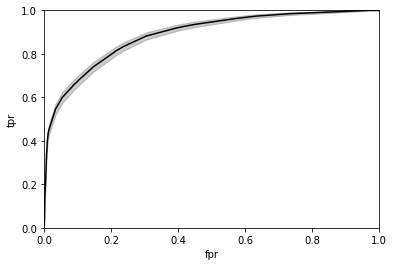

In [4]:
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

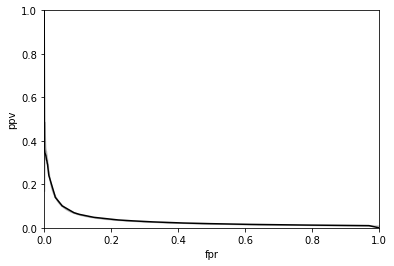

In [5]:
ax=plt.gca()
ax=zt.get().ppv.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].ppv,y2=zt.df_lim['L'].ppv, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('ppv');

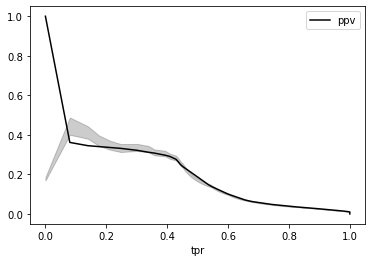

In [6]:
ax=plt.gca()
ax=zt.get().plot(ax=ax,x='tpr',y='ppv',color='k')
plt.fill_between(x=zt.get()['tpr'], y1=zt.df_lim['U'].ppv,y2=zt.df_lim['L'].ppv, color='k',alpha=.2)

In [7]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,1.000000,0.990000,0.990000,59.735339,1.000000,1.470513
0.001,0.080175,0.361694,0.989363,0.990781,56.153067,0.921153,0.380974
0.002,0.139650,0.345121,0.988686,0.991363,52.201465,0.862598,0.349475
0.003,0.175802,0.340570,0.988262,0.991717,51.172271,0.826949,0.332624
0.004,0.211953,0.336019,0.987838,0.992071,50.143077,0.791299,0.315774
...,...,...,...,...,...,...,...
0.996,1.000000,0.001330,0.013881,1.000753,1.004043,0.000000,0.001358
0.997,1.000000,0.000998,0.012911,1.000781,1.003032,0.000000,0.001356
0.998,1.000000,0.000665,0.011941,1.000809,1.002022,0.000000,0.001355


In [8]:
zt.df_lim['U']

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.186057,0.990000,0.990000,74.337072,1.000000,1.470513
0.001,0.094300,0.487843,0.989953,0.990925,94.300275,0.906606,0.380974
0.002,0.157680,0.443319,0.989597,0.991547,78.839861,0.844008,0.349475
0.003,0.195601,0.397078,0.988986,0.991916,65.200424,0.806819,0.332624
0.004,0.233211,0.370641,0.988372,0.992284,58.302850,0.769868,0.315774
...,...,...,...,...,...,...,...
0.996,1.000000,0.010040,0.013960,1.000000,1.004016,0.000000,0.001358
0.997,1.000000,0.010030,0.012970,1.000000,1.003009,0.000000,0.001356
0.998,1.000000,0.010020,0.011980,1.000000,1.002004,0.000000,0.001355


In [9]:
zt.df_lim['L']

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.168965,0.990000,0.990000,50.791700,1.000000,1.470513
0.001,0.066050,0.400180,0.989670,0.990645,66.049579,0.934885,0.380974
0.002,0.121621,0.380515,0.989236,0.991188,60.810285,0.880140,0.349475
0.003,0.156002,0.344374,0.988590,0.991522,52.000743,0.846537,0.332624
0.004,0.190695,0.325033,0.987947,0.991859,47.673826,0.812555,0.315774
...,...,...,...,...,...,...,...
0.996,1.000000,0.010040,0.013960,1.000000,1.004016,0.000000,0.001358
0.997,1.000000,0.010030,0.012970,1.000000,1.003009,0.000000,0.001356
0.998,1.000000,0.010020,0.011980,1.000000,1.002004,0.000000,0.001355


In [ ]:
# compute auc with confidence bounds
zt.auc(alpha=.001)

In [ ]:
# required sample size
zt.samplesize(delta_auc=.1)

In [ ]:
import numpy as np
pd.DataFrame(np.array([zt.samplesize(delta_auc=a) 
                       for a in np.arange(.05,.1,.001)]),
             np.arange(.05,.1,.001)).plot(logy=True)
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('minimum samples');

In [ ]:
pd.DataFrame([zt.pvalue(delta_auc=a) for a in np.arange(0.001,.1,.001)],
             np.arange(0.001,.1,.001)).plot()
plt.gca().set_ylim(0,0.05)   
plt.gca().set_xlim(0.0196,0.035)   
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('pvalue');

In [ ]:
zt.operating_zone(LRminus=.65)
rf0,txt0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=10)
rf1,txt1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=10)
display(zt._operating_zone)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))

In [ ]:
pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

In [ ]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\\hline\n')     